In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df = df.rename(columns={
    'v1': 'target',
    'v2': 'content'
})

df.head()

,target,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df['target'] = df['target'].map({
    'ham': 0,
    'spam': 1
})

df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [11]:
df.isnull().sum()

target     0
content    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

<Axes: xlabel='target', ylabel='count'>

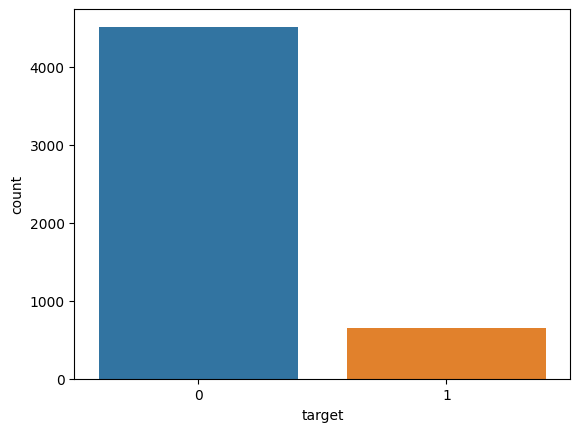

In [18]:
sns.countplot(data=df, x='target')

In [19]:
import stop_words
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([word for word in words if word not in stopwords and len(word) > 2])
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    
df['cleaned_content'] = df['content'].apply(clean_text)

/tmp/ipykernel_36/2913307993.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_content'] = df['content'].apply(clean_text)


In [20]:
df.head()

,target,content,cleaned_content
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf_vect = TfidfVectorizer()

df_vect = tdidf_vect.fit_transform(df['cleaned_content'])

In [22]:
from sklearn.model_selection import train_test_split

X = df_vect
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (4135, 7254)
test size: (1034, 7254)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)

score = accuracy_score(y_pred, y_test)
print(f'Score: {score}')

Score: 0.9439071566731141


In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=350, max_depth=10)

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

rfc_score = accuracy_score(rfc_pred, y_test)
print('Random Forest score:', rfc_score)

Random Forest score: 0.8800773694390716


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_score = accuracy_score(knn_pred, y_test)
print('KNN score', knn_score)

KNN score 0.9197292069632496


In [35]:
import xgboost

xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)

xg_pred = xg.predict(X_test)

xg_score = accuracy_score(xg_pred, y_test)
print('XG score', xg_score)

XG score 0.97678916827853
